<a href="https://colab.research.google.com/github/positmin/positmin/blob/main/06_1_PCA_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA(principle component Analysis) 
# 20221013
# 11:30

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)


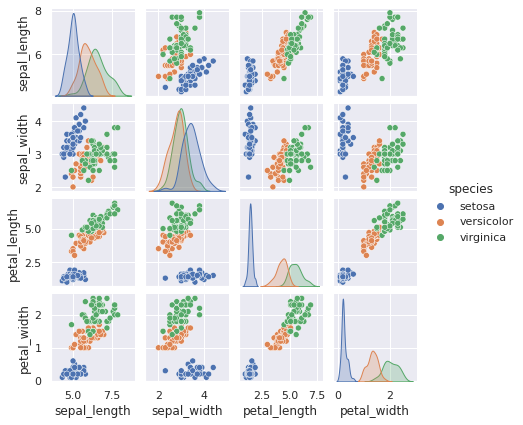

In [ ]:
import seaborn as sns;
import matplotlib.pyplot as plt
sns.set()
iris = sns.load_dataset("iris")
print(iris.head()) # 150 x 4## shape 차수, # target = 150 x 5 타겟은 반드시 알아야합니다 모르면 공부 안하고 있다는 거
print(iris.shape)
# 상관도 : 두 개의 변수간의 관계
sns.pairplot(iris, hue='species', height=1.5);

In [ ]:
# pandas DataFrame (Index가 발달)
# iloc, loc (행, 열)
X_iris = iris.iloc[:,:4] # 종속변수 제거
from sklearn.decomposition import PCA 
model = PCA(n_components=4) # 주성분계수를 의미
model.fit(X_iris) # (공분산행렬, 상관계수행렬) => 고유값 분해 (고유값 + 고유벡터)
# 원본 데이터(노이즈가 있고, 변수상관성) => 직교하는 공간으로 재배치
X_2D = model.transform(X_iris) # 원본데이터를 직교 공간(eigen vector: 직교)으로 보냄 ## 11:54
# 행렬곱 => 내적의 연속
# 150 x 4  4 x 2 => 150 x 2
## X_iris와 X_2D는 다름


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


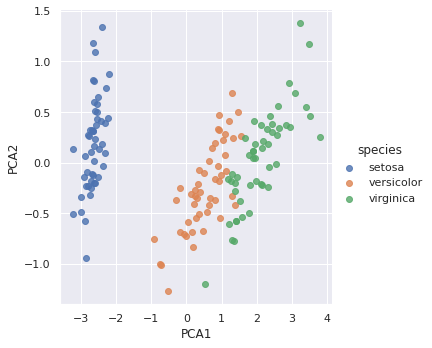

In [ ]:
# 고유값으로 정렬된 상태
iris['PCA1'] = X_2D[:, 0] # 제 1주성분
iris['PCA2'] = X_2D[:, 1] # 제 2주성분
sns.lmplot("PCA1", "PCA2", hue = 'species', data = iris, fit_reg = False) ## 대문자 I 아님 소문자 l, 소문자 L임
plt.show()

# 분해 : 복잡 -> 간단하게 표현 -> 계산도 간단
# eigen 분해와 SVD(singular value decomposition)의 차이 12:00
- 고유값 분해 -> 정방행렬, 대칭행렬
- SVD : 비정방행렬에 대하여 마치 고유값 분해하듯이 적용
- 더 넓은 범위:
- PCA를 SVD를 이용해서 구현
- 10 x 5 대하여 SVD
- 3개로 분할 (결과) : sklearn.decompostion
- 원본행렬 =  10x10    10x5대각행렬(대각으로만 값이 있음)      5x5
- TM, 추천

In [ ]:
import numpy as np ## 12:23
np.random.seed(4) ## seed값을 주는 이유? # 항상 같은 결과 : 의사난수
m = 60 # 데이터 개수
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2- 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2 ## noise를 주었죠
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
print('X.shape:', X.shape)

X.shape: (60, 3)


In [ ]:
import pandas as pd
df = pd.DataFrame(X, columns = ['$X_1$', '$X_2$', '$X_3$'])
df.head(10)

,$X_1$,$X_2$,$X_3$
0,-1.015700,-0.550913,-0.261326
1,-0.007717,0.599586,0.035078
2,-0.953171,-0.464537,-0.249203
3,-0.920123,0.210096,0.021824
4,-0.763097,0.158261,0.191525
5,1.118161,0.325087,0.317106
6,-1.022589,-0.643841,-0.133687
7,0.673520,-0.273425,-0.007878
8,1.016196,0.515466,0.467833
9,0.549577,0.677280,0.234016


# 공분산 = 두 변수간의 관계 12:27
- 분산의 기준점 : 평균
- 분산 = (값 - 평균) ** 2 => 불확실 ## 얼마나 불확실하냐는 거죠?
- 공분산 = sigmaΣ((x값 - 평균) * (y값 - 평균)) / (n - 1) => +와 -가 있음 ## 60개, 60개 맞죠?
## 내적 연산과 같다

In [ ]:
# X1
X[:,0] - X[:,0].mean()
X.shape

(60, 3)

In [ ]:
# 60x3
X.mean(axis=0) # 열로 평균

array([0.02406745, 0.20932515, 0.07155422])

In [ ]:
# numpy 연산 앞뒤 차수가 일치해야 됨 : broadcasting
# 행렬에서 모양을 만듬
X_cen = X - X.mean(axis=0)
      # 60 x 3, 1 x 3
X_cen.shape ## 왜 60, 3인가?
X_cen

(60, 3)

In [ ]:
np.dot(X_cen.T, X_cen) # 3x60, 60x3  => 3x3 
## 전치를 시켜놓고 두개를 곱하니까 몇개가 나와야 해요? 60번 60번 곱한게 3번 나와야하잖아


array([[41.18958451, 10.40791818,  7.16137913],
       [10.40791818, 10.63018922,  4.27963197],
       [ 7.16137913,  4.27963197,  2.68590523]])

In [ ]:
# 상관계수는 내적의 결과와 동일하다 ## 12:41

In [ ]:
# 공분산이나 상관계수 행렬의 차수
# 행과 열에 변수의 개수 ( 정방행렬 )
# 변수가 3개이면 => 3x3이 나와야죠?
X_cov = np.dot(X_cen.T, X_cen) / 59 ## 시그마까지 되었죠?
## 공분산 = sigmaΣ((x값 - 평균) * (y값 - 평균)) / (n - 1) => +와 -가 있음 -> np.dot(X_cen.T, X_cen)
print(X_cov)

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [ ]:
np.cov(X_cen.T) # 전치된 데이터를 입력해야 올바른 공분산 행렬을 얻음

array([[0.69812855, 0.17640539, 0.12137931],
       [0.17640539, 0.1801727 , 0.07253614],
       [0.12137931, 0.07253614, 0.04552382]])

In [ ]:
np.cov(X_cen)

array([[ 0.1267435 , -0.01128546,  0.11662724, ..., -0.02385964,
         0.19091738, -0.06832613],
       [-0.01128546,  0.06004141, -0.0042875 , ...,  0.00073465,
         0.0253184 ,  0.0059223 ],
       [ 0.11662724, -0.0042875 ,  0.10794813, ..., -0.02209878,
         0.18004949, -0.06288925],
       ...,
       [-0.02385964,  0.00073465, -0.02209878, ...,  0.00452433,
        -0.03693673,  0.0128663 ],
       [ 0.19091738,  0.0253184 ,  0.18004949, ..., -0.03693673,
         0.31791833, -0.10303744],
       [-0.06832613,  0.0059223 , -0.06288925, ...,  0.0128663 ,
        -0.10303744,  0.03683437]])

In [ ]:
w, v = np.linalg.eig(X_cov) # 고유값 분해

print('eigenvalue :', w) # 정렬된 값(그 축으로의 분산) # 분산이 크면 중요변수 : 제1주성분, 제2주성분
print('eigenvector : \n', v) # 직교 == 0
## 행과 열끼리 내적을 내면 0, 직교

eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector : 
 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [ ]:
print("설명력 : ", w/w.sum()) 
## eigenvalue : [0.77830975 0.1351726  0.01034272] 이렇게 나온값에 대해 절대값 상대값으로 바꿔지면

설명력 :  [0.84248607 0.14631839 0.01119554]


In [ ]:
# 60x3
U, D, V_t = np.linalg.svd(X_cen) ## 결과가 3개가 나왔죠? ## D가 두번 곱하죠 두번 곱한 효과가 있으니까 singular value는 반값이 나오죠
print(U.shape, D.shape, V_t.shape)
print('singular value :', D) # 고유와 같은 역할
print('singular vector : \n', V_t.T)

(60, 60) (3,) (3, 3)
singular value : [6.77645005 2.82403671 0.78116597]
singular vector : 
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [ ]:
print('explained variance ratio : ', D ** 2 / np.sum(D**2))
## 아이젠분해나 같다고 얘기 할 수 있죠? 12:53

explained variance ratio :  [0.84248607 0.14631839 0.01119554]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [ ]:
# 이해
print('singular value :', pca.singular_values_)
print('singular vector : \n', pca.components_.T) # 값이 같은 부호만 -임

singular value : [6.77645005 2.82403671 0.78116597]
singular vector : 
 [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]


In [ ]:
print('eigen_value :', pca.explained_variance_) # 고유값분해
print('explained variance ratio :', pca.explained_variance_ratio_) # 분산의 상대비인 설명력

eigen_value : [0.77830975 0.1351726  0.01034272]
explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
# 0부터 인덱스 시작
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :', d) ## 둘만 남는거죠 13:00

[0.84248607 0.98880446 1.        ]
선택할 차원 수 : 2


In [ ]:
pca = PCA(n_components=0.95) # 변수개수를 소수점으로 주어지면 13:02
X_proj = pca.fit_transform(X)
pca.components_.T

array([[-0.93636116,  0.34027485],
       [-0.29854881, -0.90119108],
       [-0.18465208, -0.2684542 ]])

In [ ]:
# 0~9까지의 숫자 손글씨를 정확하게 분류 14:11
# 2.x + keras가 중심이 되어 있음
#() ------------------) => PCA를 통하여 특징을 잡아줌 눈, 코, 입
# ML에서는 하나의 행으로 입력 => 특징을 발견하기 어려움 => CNN(Convolution neural network) 99% 
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
28*28

784

In [ ]:
train_x = train_x.reshape(-1, 28*28) # 784개로 만들어짐 # 50000, 10000장의 테스트
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_x) # 주성분 축으로 표현된 데이터

In [ ]:
print(pca.n_components_) # 784개 였는데, 95%만 잡으니까 => 154개의 주성분으로 표시됨

154


In [ ]:
train_x.shape # 60000, 10000 => 70000

(60000, 784)

In [ ]:
X_reduced.shape

(60000, 154)

In [ ]:
pca.components_.shape # (154, 784) # 154개의 주성분

(154, 784)

In [ ]:
train_x @ pca.components_.T

array([[ 880.73143303, -329.95076555,  197.60632371, ...,   54.97192902,
         -19.29952488,   39.69503957],
       [1768.51722024, -312.13354179,  818.4599365 , ...,    7.19422984,
         -11.67405929,  -12.63814332],
       [ 704.94923633,  374.89664934,   33.61062603, ...,  -54.24289111,
          49.26354687,  -73.17317528],
       ...,
       [ 578.74539477,  142.80170756,  -35.4927068 , ...,   55.49778647,
          88.78258496,   -5.68471007],
       [ 887.40491646,  -22.86843995,  735.97904942, ...,   23.26128512,
           5.84612776,  -65.16016859],
       [ 583.36289193,  -41.99530579,  778.13926939, ...,   52.44853801,
          13.41567232,  -45.63492499]])

In [ ]:
(train_x @ pca.components_.T).shape

(60000, 154)

# 문제 : 60000, 154 데이터를 노이즈가 제거된 원래의 사이즈 이미지로 변환해 보시오 +. 78 * 78 14:26

In [ ]:
# 원래 이미지 : 60000 * 28 * 28
# reshape 이미지 : 60000 * 784 : 왜냐하면 데이터는 학습을 위해서 하나의 행으로 들어가야함
  # 김종호 90 80 0 => 
# PCA의 특징이 추출된 이미지(주성분으로 재표현된 이미지) : 60000 * 154 => 분류 행렬 154x784 => 60000x784
## 14:32
# 60000 * 784
# # reshape : 60000 * 28 * 28 => 노이즈가 제거된 이미지
## components를 곱해주면 될거아냐? reduce에 곱해주면 되죠? 골뱅이 해줘야되죠?

In [ ]:
X_reduced @ pca.components_ # deep learning 시대 -> ## components_ _ 밑줄 반드시 붙일 것
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape # 60000 x 784

(60000, 784)

In [ ]:
X_recovered.reshape(-1, 28, 28) ## 왜 -1이냐, 왜 나머지 다냐?  2개가 결정이 되면
## 78, 78이 아니라 28 28 입니다 

array([[[ 2.64687454e-14, -2.28222475e-13,  8.59715282e-15, ...,
          1.34346440e-13, -7.58389473e-14,  5.89750330e-14],
        [ 9.49671118e-14,  5.91177087e-14,  5.29748138e-14, ...,
         -7.96937914e-15, -1.39303163e-14, -5.38739374e-14],
        [-6.65557588e-16,  2.32313423e-14, -6.45549824e-03, ...,
          7.05042450e-03,  2.15252462e-14,  2.10289083e-14],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  2.50649569e-02, ...,
          4.17359828e-02,  1.72214746e-03,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.68258992e-02,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 1.64609603e-15, -9.95572106e-14,  2.72629517e-13, ...,
          1.14408883e-13,  3.96629249e-15,  8.08533417e-14],
        [-8.60284870e-14,  1.05187314e-13,  2.13125382e-14, ...,
         -8.79541680e-15,  5.02494514e

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# 이미지 : instances
def plot_digits(instances, images_per_row=5, **options): # ** 별 두개는 변동 매개변수 key = data
  size = 28
  # len 2차원 => 행수 == 이미지 장수
  images_per_row = min(len(instances), images_per_row)
  # 이미지 원래 사이즈로 변환
  images = [instance.reshape(size,size) for instance in instances]
  n_rows = (len(instances) - 1) // images_per_row + 1 # 5장이 되는 것 : 줄 수를 결정
  row_images = []
  n_empty = n_rows * images_per_row - len(instances) # 5, 10, 15, 20개 
  images.append(np.zeros((size, size * n_empty))) # 마지막을 채워서 정사각형의 미지 형태를 이루는 것 
  for row in range(n_rows): # 한 행씩 (5장)
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis=1)) ## 합쳐서 이미지에 업로드 시켜라 concatenate
  image = np.concatenate(row_images, axis=0) # 전체 이미지가 되는 거죠
  plt.imshow(image, cmap = matplotlib.cm.binary, **options)
  plt.axis("off")

Text(0.5, 1.0, 'image with no noise')

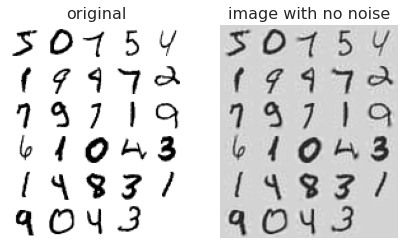

In [ ]:
import matplotlib
plt.figure(figsize=(7,4))

plt.subplot(121)
plot_digits(train_x[::2100]) # 학습 이미지 # 784
plt.title("original",fontsize=16)

plt.subplot(122)
plot_digits(X_recovered[::2100]) # 학습 이미지 # 784 (노이즈가 없는 데이터)
plt.title("image with no noise", fontsize = 16)

In [ ]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for batch_x in np.array_split(train_x, n_batches): # 배치 사이즈를 이용해서 처리
  print(".", end="")
  inc_pca.partial_fit(batch_x)
X_reduced = inc_pca.transform(train_x)

....................................................................................................

In [ ]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

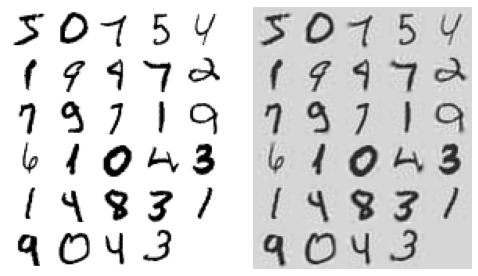

In [ ]:
plt.figure(figsize=(7,4)) ## 15:00

plt.subplot(121)
plot_digits(train_x[::2100])

plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])

plt.tight_layout()

In [ ]:
# deep learning으로 모델을 생성하는 것은 불가능
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.feature_names) # , feature_names가 아님
print(type(cancer))
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,random_state=1)
print(type(X_train))
print(X_train.shape)
print(X_train.dtype)
print(X_test.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(426, 30)
float64
(143, 30)


In [ ]:
# svm : optimization (최적화) (제1최적화(support vector), 제2최적화(convexhull)) ## 최외각을 지나는것이 제 2최적화
# 분류 중심값 : hyper plane
# 고차원 kernel 
from sklearn.svm import SVC
svm = SVC(C=100) # C, gamma 모양을 통제 : hyper parameter 0.01
## https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.94


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) # 0~1 사이의 데이터로 변환
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("스케일 조정 후 특성별 최소값:\n{}", format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n{}", format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최소값:
{} [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
{} [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [ ]:
#머신러닝은 scaling에 민감하다
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


In [ ]:
# 문제 (Z점수 정규화) ## 15:39
# - StandardScaler를 이용해서 scaling하고 테스트 정확도를 출력하시오
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) # 0~1 사이의 데이터로 변환
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


In [ ]:
# 문제
# 모델(분류, 예측) / 모델이 아닌 경우(전처리, 차원축소) ## 15:44
# predict, transform
# PCA(component 2개)를 적용하고 scoring해보시오, transform의 대상

In [ ]:
from sklearn.decomposition import PCA  ## 16:04
pca = PCA(n_components=.95)
pca.fit(X_train_scaled)
X_pca_train = pca.transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)
X_pca_reversed = pca.inverse_transform(X_pca_train)


In [ ]:
# 30개를 다쓰지 않고 10개의 변수만을 사용함 (1/3변수가 줄어듬) => 일반화된 모델, 견고한 모델
svm.fit(X_pca_train, y_train)
svm.score(X_pca_test, y_test) # 0.9440559440559441

0.958041958041958

In [ ]:
pca.n_components_

10

In [ ]:
for x in range(1, 30): ## 31까지만 가능
  pca = PCA(n_components=x)
  pca.fit(X_train_scaled)
  X_t_train = pca.transform(X_train_scaled)
  X_t_test = pca.transform(X_test_scaled)
  svm = SVC(C=100)
  svm.fit(X_t_train, y_train)
  print("SVM 테스트 정확도{} : {:.2f}".format(x, svm.score(X_t_test, y_test)))

SVM 테스트 정확도1 : 0.90
SVM 테스트 정확도2 : 0.94
SVM 테스트 정확도3 : 0.94
SVM 테스트 정확도4 : 0.93
SVM 테스트 정확도5 : 0.93
SVM 테스트 정확도6 : 0.96
SVM 테스트 정확도7 : 0.93
SVM 테스트 정확도8 : 0.94
SVM 테스트 정확도9 : 0.97
SVM 테스트 정확도10 : 0.96
SVM 테스트 정확도11 : 0.96
SVM 테스트 정확도12 : 0.96
SVM 테스트 정확도13 : 0.96
SVM 테스트 정확도14 : 0.95
SVM 테스트 정확도15 : 0.95
SVM 테스트 정확도16 : 0.95
SVM 테스트 정확도17 : 0.95
SVM 테스트 정확도18 : 0.95
SVM 테스트 정확도19 : 0.95
SVM 테스트 정확도20 : 0.96
SVM 테스트 정확도21 : 0.96
SVM 테스트 정확도22 : 0.96
SVM 테스트 정확도23 : 0.96
SVM 테스트 정확도24 : 0.96
SVM 테스트 정확도25 : 0.96
SVM 테스트 정확도26 : 0.97
SVM 테스트 정확도27 : 0.97
SVM 테스트 정확도28 : 0.97
SVM 테스트 정확도29 : 0.97


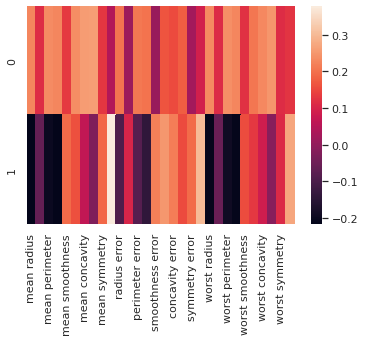

In [ ]:
import pandas as pd
df = pd.DataFrame(pca.components_[:2], columns = cancer.feature_names)
ax = sns.heatmap(df)
plt.show()

([<matplotlib.axis.XTick at 0x7fad9f30ad90>,
 [Text(0, 1, 'mean radius'),
  Text(0, 1, 'mean texture'),
  Text(0, 1, 'mean perimeter'),
  Text(0, 1, 'mean area'),
  Text(0, 1, 'mean smoothness'),
  Text(0, 1, 'mean compactness'),
  Text(0, 1, 'mean concavity'),
  Text(0, 1, 'mean concave points'),
  Text(0, 1, 'mean symmetry'),
  Text(0, 1, 'mean fractal dimension'),
  Text(0, 1, 'radius error'),
  Text(0, 1, 'texture error'),
  Text(0, 1, 'perimeter error'),
  Text(0, 1, 'area error'),
  Text(0, 1, 'smoothness error'),
  Text(0, 1, 'compactness error'),
  Text(0, 1, 'concavity error'),
  Text(0, 1, 'concave points error'),
  Text(0, 1, 'symmetry error'),
  Text(0, 1, 'fractal dimension error'),
  Text(0, 1, 'worst radius'),
  Text(0, 1, 'worst texture'),
  Text(0, 1, 'worst perimeter'),
  Text(0, 1, 'worst area'),
  Text(0, 1, 'worst smoothness'),
  Text(0, 1, 'worst compactness'),
  Text(0, 1, 'worst concavity'),
  Text(0, 1, 'worst concave points'),
  Text(0, 1, 'worst symmetry'),
 

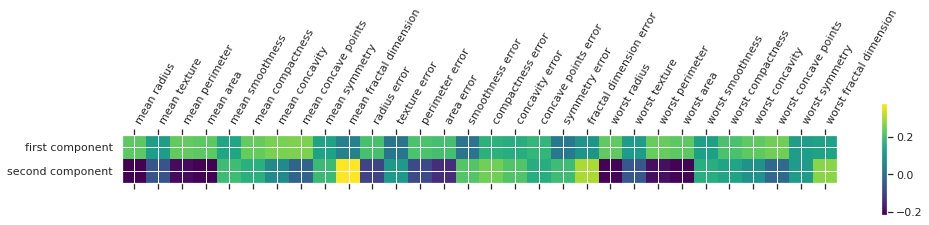

In [ ]:
plt.matshow(pca.components_[:2], cmap='viridis') ## 16:16
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')

In [ ]:
# iris = sns.load_dataset("iris") 16:20
# PCA를 적용하고 SVM 모델의 SVC를 이용해서 분류모델을 생성하고
# accuracy, precision, recall, f1_score를 확인하시오
## 혼동행렬도 구해보시오

In [ ]:
## 정답 17:15
import seaborn as sns; 
import matplotlib.pyplot as plt
sns.set()
iris = sns.load_dataset("iris")

In [ ]:
X_iris = iris.iloc[:,:4]
y_iris = iris.iloc[:,4]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris,y_iris, random_state=1)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = PCA(n_components=2)
model.fit(X_train_scaled)
X_pca_train = model.transform(X_train_scaled)
X_pca_test = model.transform(X_test_scaled)

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_pca_train, y_train)
svm.score(X_pca_test, y_test)

0.9736842105263158

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
pred = svm.predict(X_pca_test)
print("정확도", accuracy_score(pred, y_test))
print("정밀도", precision_score(pred, y_test, average='macro'))
print("재현율", recall_score(pred, y_test, average='macro'))
print("f점수", f1_score(pred, y_test, average='macro'))
print("혼동행렬", confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

정확도 0.9736842105263158
정밀도 0.9791666666666666
재현율 0.9666666666666667
f점수 0.9717034521788342
혼동행렬 [[13  0  0]
 [ 0 15  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

